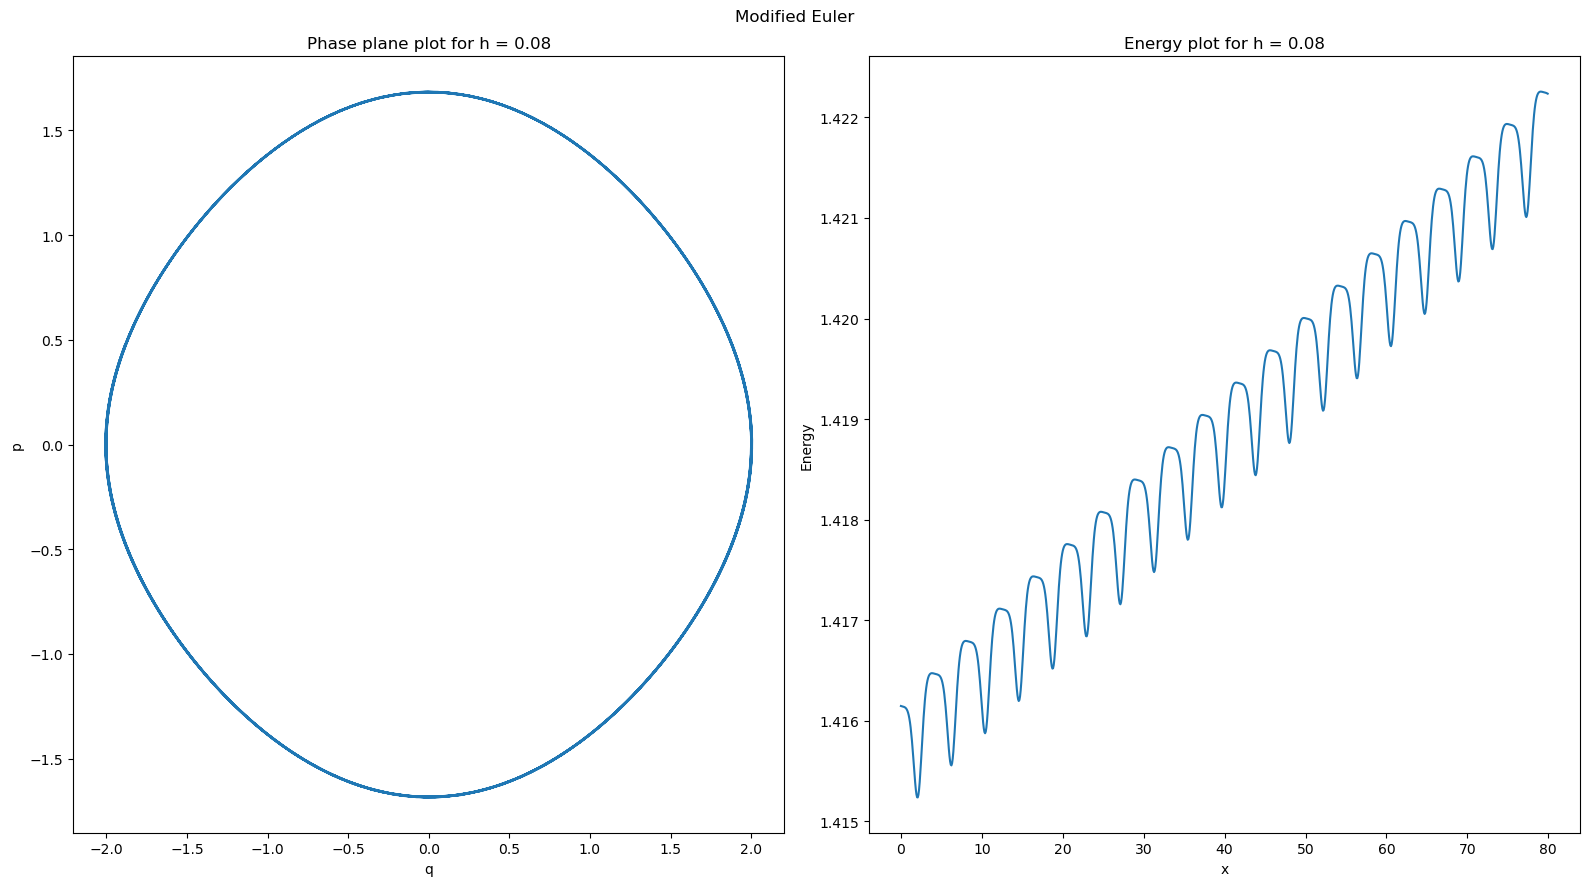

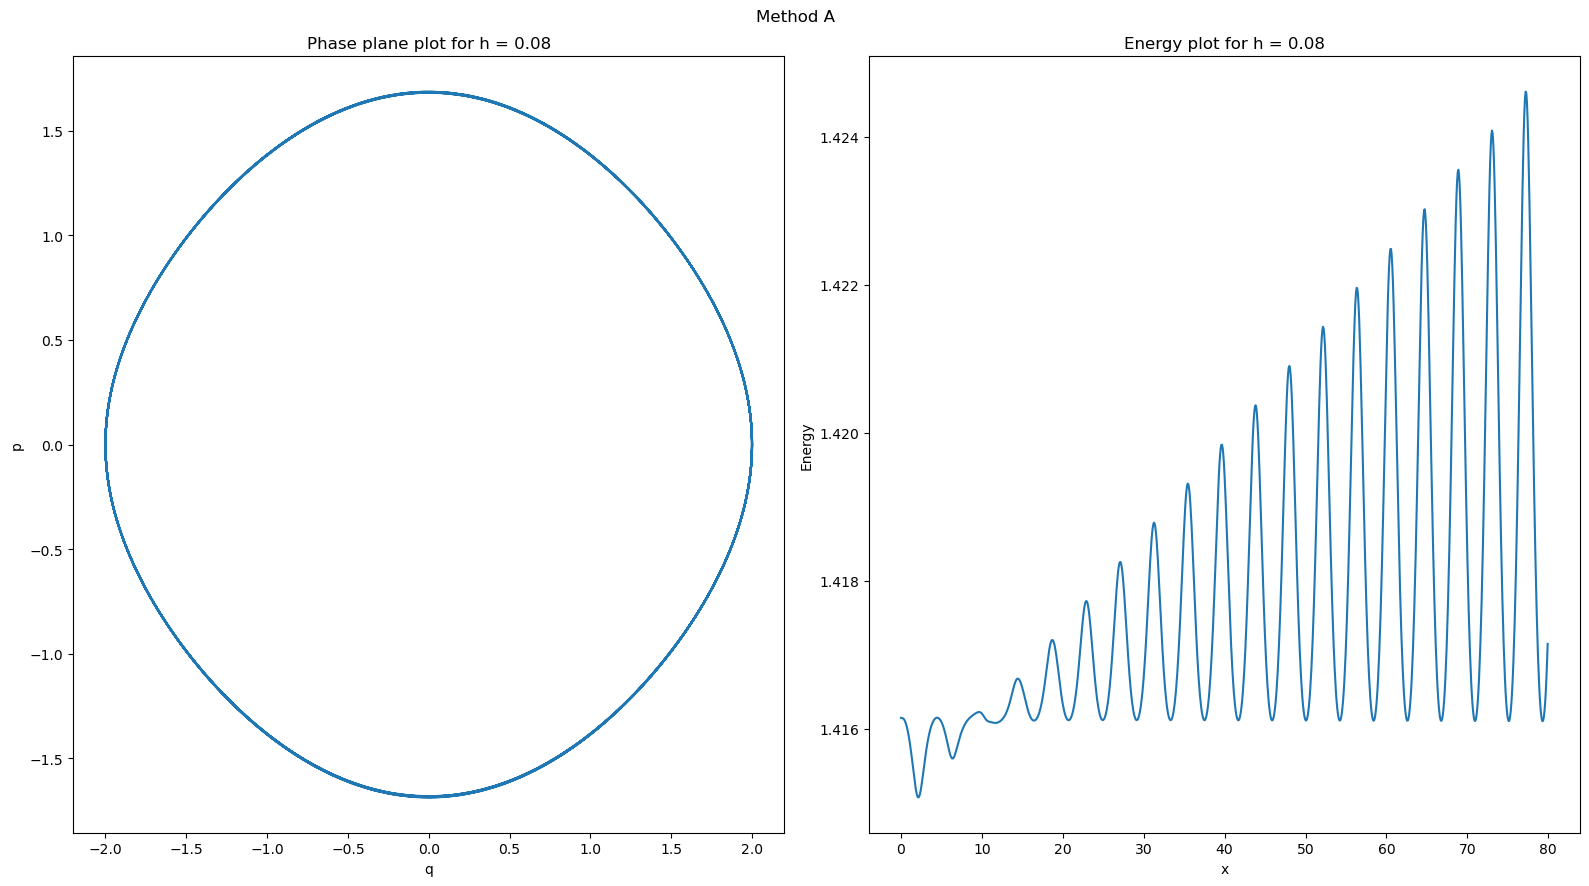

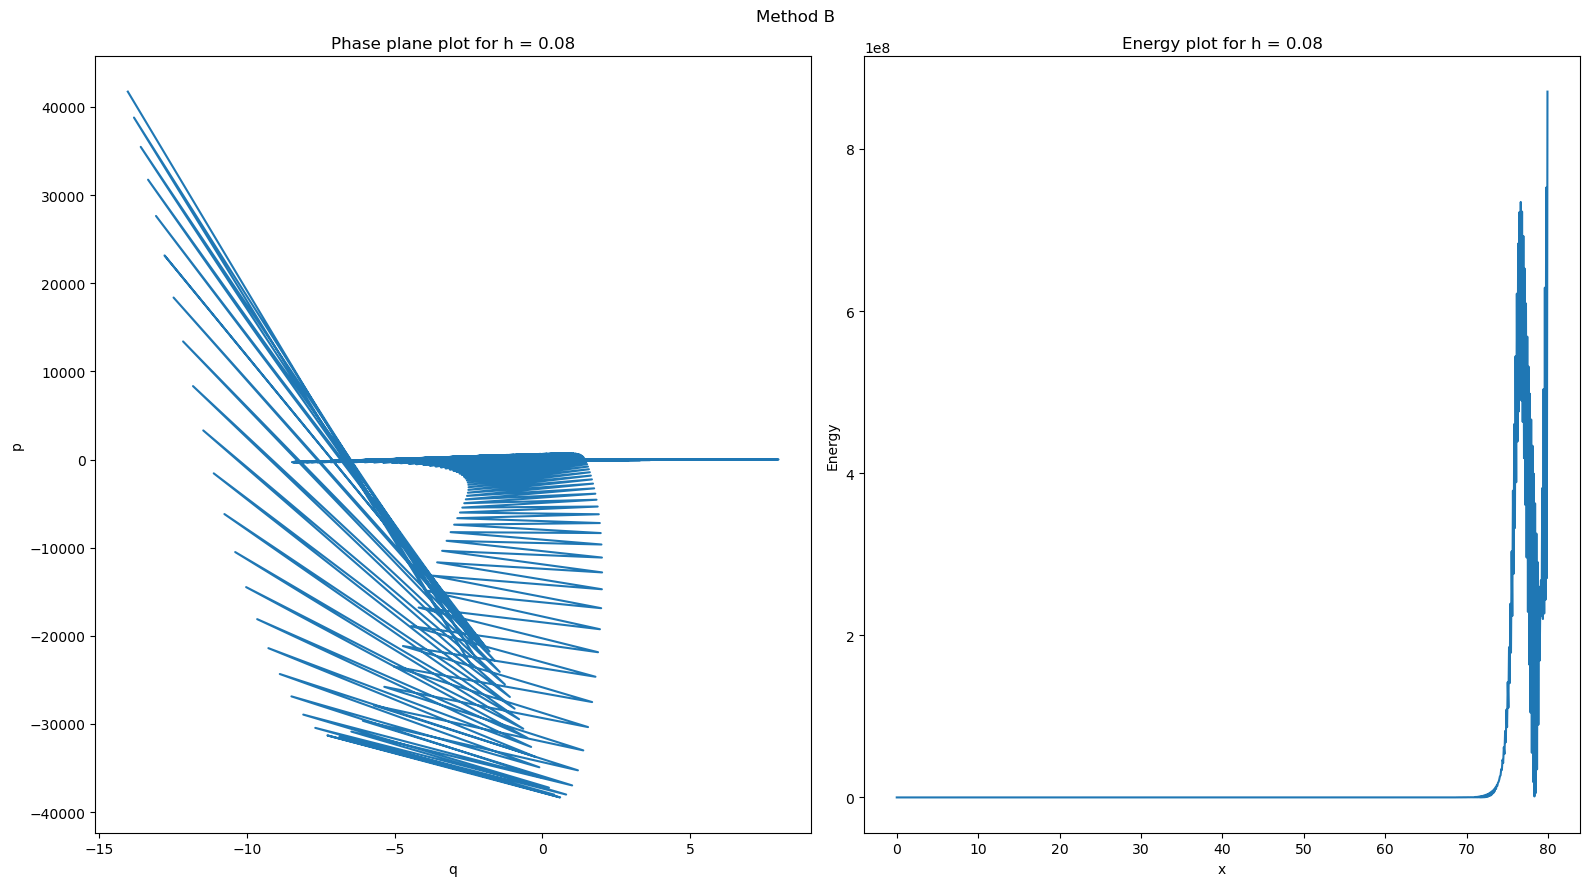

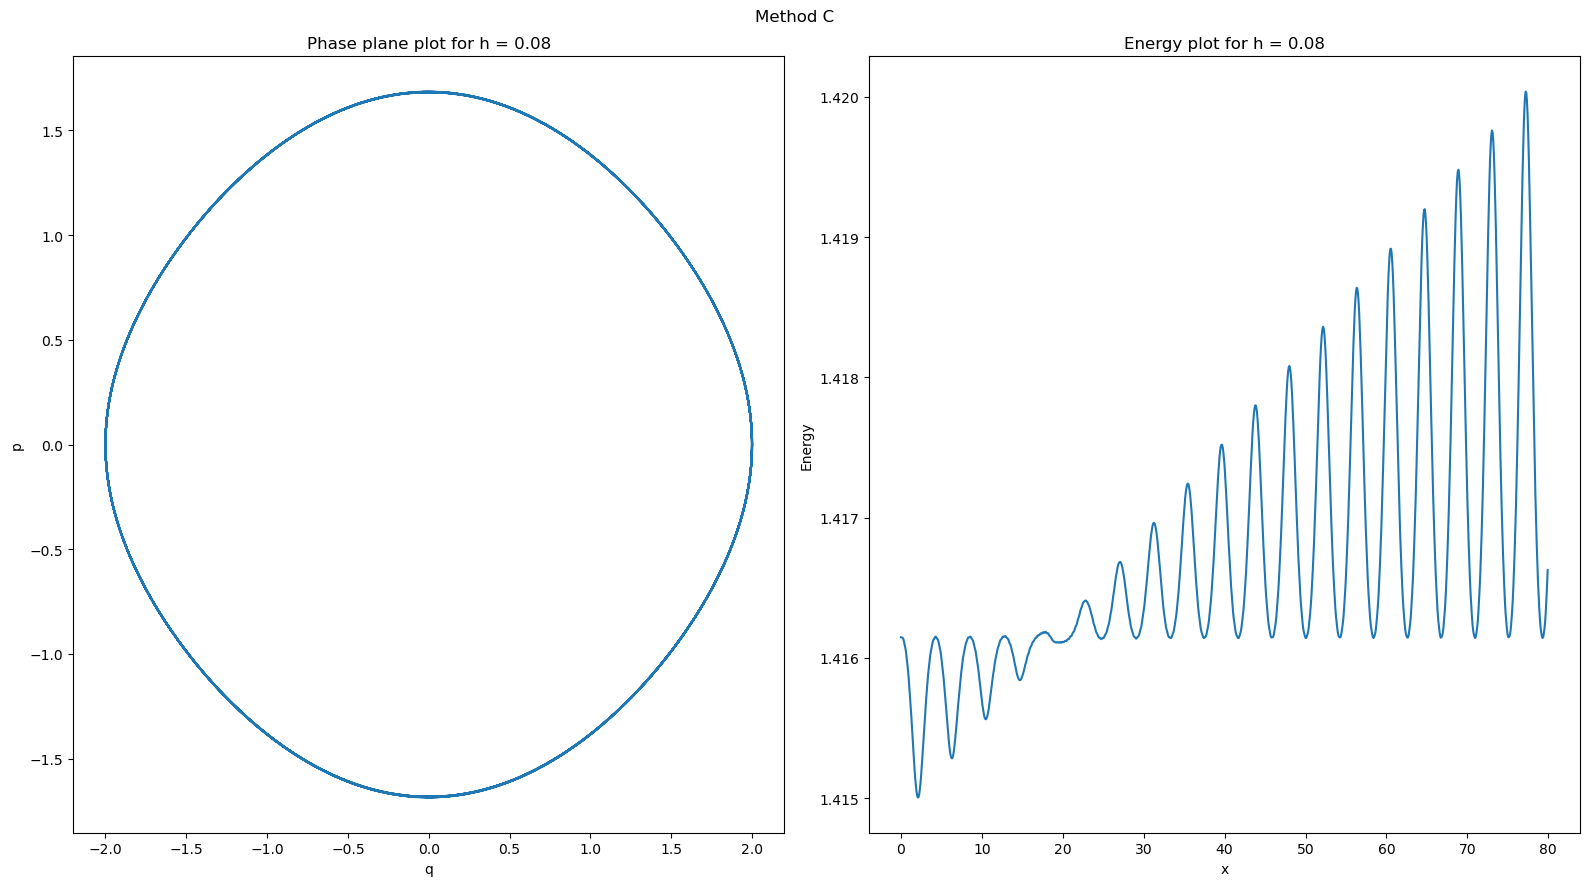

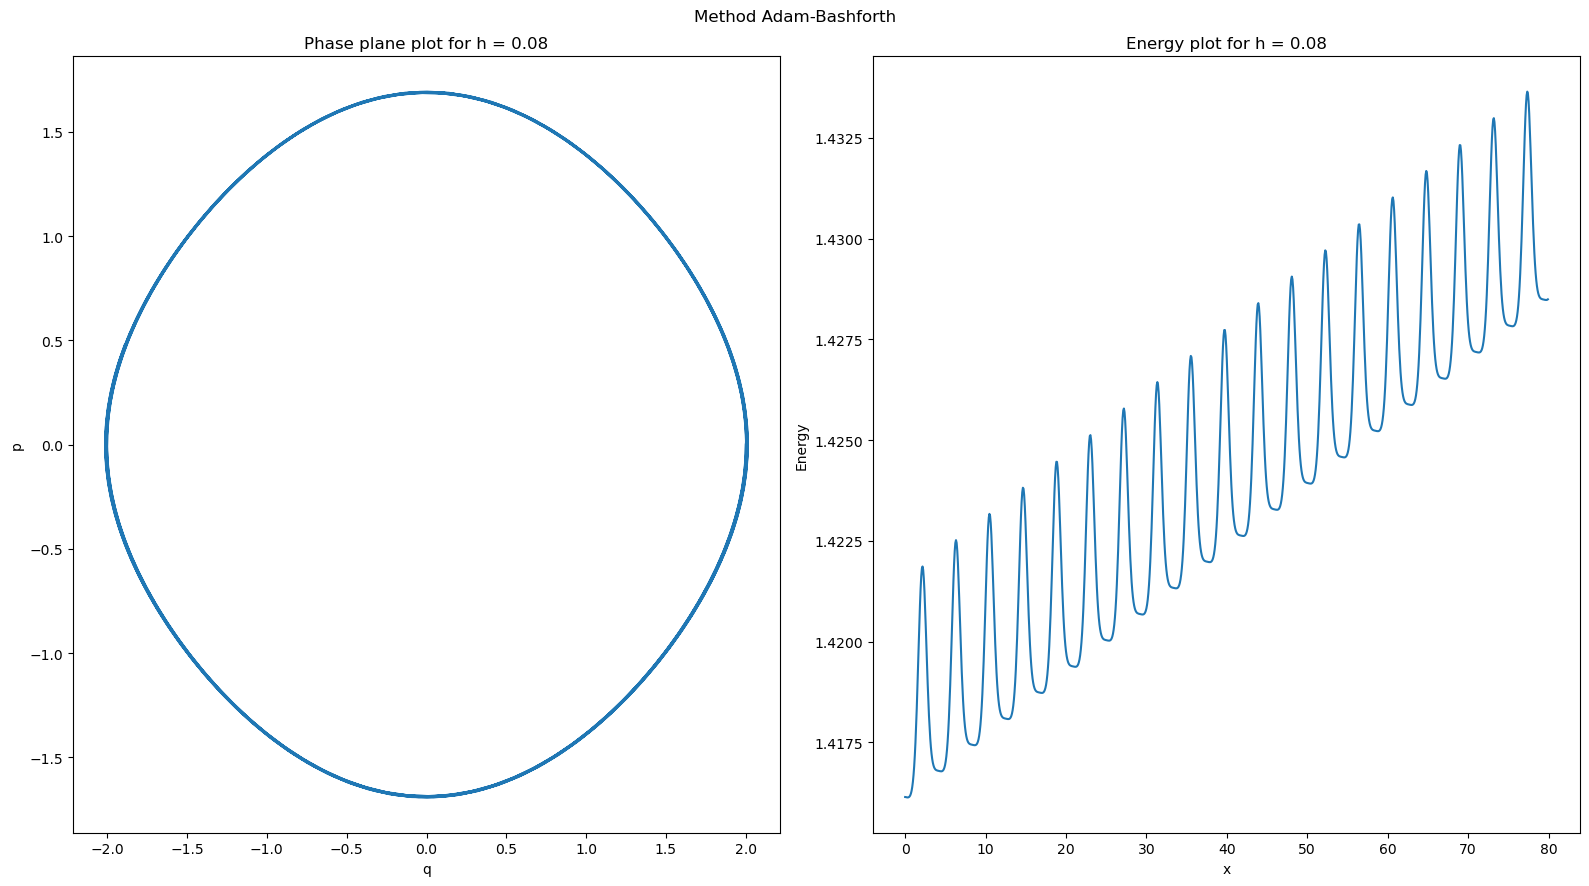

In [17]:
import numpy as np
import itertools as it
import matplotlib.pyplot as plt
from scipy.optimize import newton_krylov

def explicit_euler_mod(f, t, h, initial):
    initial = initial.reshape(-1,1)
    t = t.reshape(-1,1)
    n, _ = initial.shape
    nt, _ = t.shape
    arr_results = np.zeros((n, nt))
    arr_results[:,0] = initial.flatten()
    for i in range(len(t)-1):
        k1 = f(arr_results[:,i],t[i])
        k2 = f(arr_results[:,i] + h*k1,t[i]+h)
        arr_results[:,i+1] = arr_results[:,i] + h*(0.5*k1 + 0.5*k2).flatten()
    return arr_results

def multi_step_methodA(f, t, h, initial):

    t = t.reshape(-1,1)
    n, _ = initial.shape
    nt, _ = t.shape
    arr_results = np.zeros((n,nt))
    arr_results[:,:4] = initial

    for i in np.arange(4, len(t)):
        arr_results[:,i] = (h**2)*(7/6*f(arr_results[:,i-1], t[i-1]) - 
            5/12*f(arr_results[:,i-2], t[i-2]) + 1/3*f(arr_results[:,i-3], t[i-3]) -
            1/12*f(arr_results[:,i-4],t[i-4])) + (
                2*arr_results[:,i-1] - arr_results[:,i-2])

    return arr_results

def multi_step_methodB(f, t, h, initial):

    t = t.reshape(-1,1)
    n, _ = initial.shape
    nt, _ = t.shape
    arr_results = np.zeros((n,nt))
    arr_results[:,:4] = initial

    for i in np.arange(4, len(t)):
        arr_results[:,i] = (h**2)*(4/3*f(arr_results[:,i-1], t[i-1]) + 
            4/3*f(arr_results[:,i-2], t[i-2]) + 4/3*f(arr_results[:,i-3], t[i-3])) + (
            2*arr_results[:,i-2] - arr_results[:,i-4])

    return arr_results

def multi_step_methodC(f, t, h, initial):
    
    t = t.reshape(-1,1)
    n, _ = initial.shape
    nt, _ = t.shape
    arr_results = np.zeros((n,nt))
    arr_results[:,:4] = initial

    for i in np.arange(4, len(t)):
        arr_results[:,i] = (h**2)*(7/6*f(arr_results[:,i-1], t[i-1]) - 
            1/3*f(arr_results[:,i-2], t[i-2]) + 7/6*f(arr_results[:,i-3], t[i-3])) + (
            2*arr_results[:,i-1] - 2*arr_results[:,i-2] + 
            2*arr_results[:,i-3] - arr_results[:,i-4])

    return arr_results

def adam_bashforth(f, t, h, initial):
    initial = initial.reshape(-1,1)
    t = t.reshape(-1,1)
    n, _ = initial.shape
    nt, _ = t.shape
    arr_results = np.zeros((n,nt))
    arr_results[:,:2] = explicit_euler_mod(f, t[:2], h, initial)

    for i in np.arange(2, len(t)):
        arr_results[:,i] = (h)*(3/2*f(arr_results[:,i-1], t[i-1]) - 
            1/2*f(arr_results[:,i-2], t[i-2])) + arr_results[:,i-1]

    return arr_results

def implicit_middpoint(f, t, h, initial):
    initial = initial.reshape(-1,1)
    t = t.reshape(-1,1)
    n, _ = initial.shape
    nt, _ = t.shape
    arr_results = np.zeros((n,nt))
    arr_results[:,0] = initial

    for i in np.arange(1, len(t)):
        arr_results[:,i] = newton_krylov(lambda x: x - arr_results[:i-1] -
            h*f(arr_results[:,i-1]/2 + x/2), arr_results[:,i-1])


    return arr_results



def compute_energy(arr_p):
    return np.power(arr_p[0,:],2)/2 + 1- np.cos(arr_p[1,:]).flatten()

def f1(x, t): return np.array([-np.sin(x[1]), x[0]])
def f(x, t): return np.array([-np.cos(x[1])*x[0], -np.sin(x[1])])



a = 0
b = 80
n = 100
initial1= np.array([0,2])
h = [0.08]

t = np.arange(start=a, stop=b, step=h[0])
initial = explicit_euler_mod(f1, t[:4], h[0], initial1)


plot_type = ["phase plane", "energy"]

# Modified Euler
plot_type = ["phase plane", "energy"]


fig, axs = plt.subplots(nrows=len(h), ncols=2, figsize=(16,9))

for (step, pt), ax in zip(it.product(h,plot_type),axs.flat):
    t = np.arange(start=a, stop=b, step=step)
    s = explicit_euler_mod(f1, t, step, initial1)

    energy = compute_energy(s)
    if pt == "energy":
        ax.plot(t, energy)
        ax.set_xlabel("x")
        ax.set_ylabel("Energy")
        ax.set_title(f'Energy plot for h = {step}')
    else:
        ax.plot(s[1,:],s[0,:])
        ax.set_xlabel("q")
        ax.set_ylabel("p")
        ax.set_title(f'Phase plane plot for h = {step}')    
    # ax.plot(s[1,:])

fig.tight_layout()

fig.suptitle("Modified Euler")
fig.tight_layout()
plt.savefig("project1_modEuler")
plt.close

# Method A

fig, axs = plt.subplots(nrows=len(h), ncols=2, figsize=(16,9))

for (step, pt), ax in zip(it.product(h,plot_type),axs.flat):
    t = np.arange(start=a, stop=b, step=step)
    s = multi_step_methodA(f, t, step, initial)
    
    energy = compute_energy(s)
    if pt == "energy":
        ax.plot(t, energy)
        ax.set_xlabel("x")
        ax.set_ylabel("Energy")
        ax.set_title(f'Energy plot for h = {step}')
    else:
        ax.plot(s[1,:],s[0,:])
        ax.set_xlabel("q")
        ax.set_ylabel("p")
        ax.set_title(f'Phase plane plot for h = {step}')    
    # ax.plot(s[1,:])

fig.tight_layout()
fig.suptitle("Method A")
fig.tight_layout()
# plt.savefig("project1_expEuler")
# plt.close

# Method B

fig, axs = plt.subplots(nrows=len(h), ncols=2, figsize=(16,9))

for (step, pt), ax in zip(it.product(h,plot_type),axs.flat):
    t = np.arange(start=a, stop=b, step=step)
    s = multi_step_methodB(f, t, step, initial)
    energy = compute_energy(s)
    if pt == "energy":
        ax.plot(t, energy)
        ax.set_xlabel("x")
        ax.set_ylabel("Energy")
        ax.set_title(f'Energy plot for h = {step}')
    else:
        ax.plot(s[1,:],s[0,:])
        ax.set_xlabel("q")
        ax.set_ylabel("p")
        ax.set_title(f'Phase plane plot for h = {step}')    
    # ax.plot(s[1,:])

fig.tight_layout()
fig.suptitle("Method B")
fig.tight_layout()
# # plt.savefig("project1_expEuler")
# # plt.close

# # Method C

fig, axs = plt.subplots(nrows=len(h), ncols=2, figsize=(16,9))

for (step, pt), ax in zip(it.product(h,plot_type),axs.flat):
    t = np.arange(start=a, stop=b, step=step)
    s = multi_step_methodC(f, t, step, initial)
    energy = compute_energy(s)
    if pt == "energy":
        ax.plot(t, energy)
        ax.set_xlabel("x")
        ax.set_ylabel("Energy")
        ax.set_title(f'Energy plot for h = {step}')
    else:
        ax.plot(s[1,:],s[0,:])
        ax.set_xlabel("q")
        ax.set_ylabel("p")
        ax.set_title(f'Phase plane plot for h = {step}')    
    # ax.plot(s[1,:])

fig.tight_layout()
fig.suptitle("Method C")
fig.tight_layout()
# plt.savefig("project1_expEuler")
# plt.close


# Adam-Bashforth

fig, axs = plt.subplots(nrows=len(h), ncols=2, figsize=(16,9))

for (step, pt), ax in zip(it.product(h,plot_type),axs.flat):
    t = np.arange(start=a, stop=b, step=step)
    s = adam_bashforth(f1, t, step, initial1)
    energy = compute_energy(s)
    if pt == "energy":
        ax.plot(t, energy)
        ax.set_xlabel("x")
        ax.set_ylabel("Energy")
        ax.set_title(f'Energy plot for h = {step}')
    else:
        ax.plot(s[1,:],s[0,:])
        ax.set_xlabel("q")
        ax.set_ylabel("p")
        ax.set_title(f'Phase plane plot for h = {step}')    
    # ax.plot(s[1,:])

fig.tight_layout()
fig.suptitle("Method Adam-Bashforth")
fig.tight_layout()
# plt.savefig("project1_expEuler")
# plt.close







c:\Users\Nhat Thanh\anaconda3\envs\math228p1\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/199999 [00:00<?, ?it/s]c:\Users\Nhat Thanh\anaconda3\envs\math228p1\Lib\site-packages\scipy\optimize\_nonlin.py:367: RuntimeWarning: invalid value encountered in scalar divide
  and dx_norm/self.x_rtol <= x_norm))
100%|██████████| 199998/199998 [02:16<00:00, 1461.56it/s]


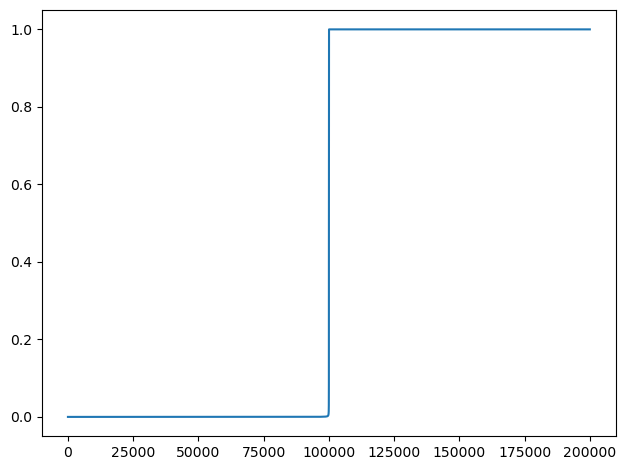

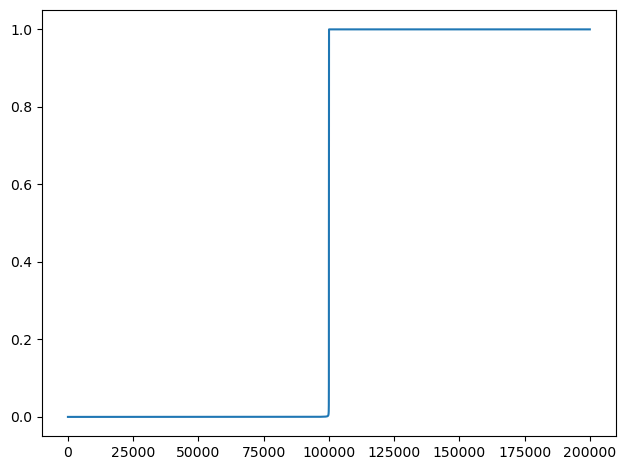

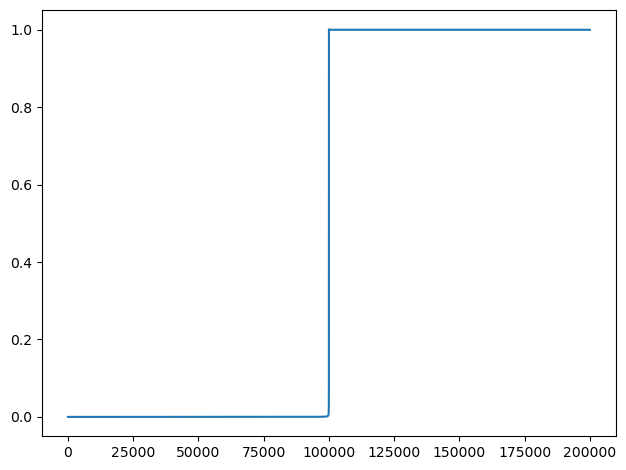

In [1]:
#Problem 2
import numpy as np
import itertools as it
import matplotlib.pyplot as plt
from scipy.optimize import newton_krylov
from tqdm.auto import trange

def explicit_euler_mod(f, t, h, initial):
    initial = initial.reshape(-1,1)
    t = t.reshape(-1,1)
    n, _ = initial.shape
    nt, _ = t.shape
    arr_results = np.zeros((n, nt))
    arr_results[:,0] = initial.flatten()
    for i in range(len(t)-1):
        k1 = f(arr_results[:,i],t[i])
        k2 = f(arr_results[:,i] + h*k1,t[i]+h)
        arr_results[:,i+1] = arr_results[:,i] + h*(0.5*k1 + 0.5*k2).flatten()
    return arr_results

def implicit_midpoint(f, t, h, initial):
    initial = initial.reshape(-1,1)
    t = t.reshape(-1,1)
    n, _ = initial.shape
    nt, _ = t.shape
    arr_results = np.zeros((n,nt))
    arr_results[:,0] = initial

    for i in trange(len(t)-1):
        arr_results[:,i+1] = newton_krylov(lambda x: x - arr_results[:,i] -
            h*f(arr_results[:,i]/2 + x/2, t[i]), arr_results[:,i]).flatten()


    return arr_results

def trapezoid(f, t, h, initial):
    initial = initial.reshape(-1,1)
    t = t.reshape(-1,1)
    n, _ = initial.shape
    nt, _ = t.shape
    arr_results = np.zeros((n,nt))
    arr_results[:,0] = initial

    for i in trange(len(t)-1):
        arr_results[:,i+1] = newton_krylov(lambda x: x - arr_results[:,i] -
            0.5*h*(f(arr_results[:,i],t[i]) + f(x,t[i])), arr_results[:,i]).flatten()


    return arr_results

def bdf(f, t, h, initial):
    initial = initial.reshape(-1,1)
    t = t.reshape(-1,1)
    n, _ = initial.shape
    nt, _ = t.shape
    arr_results = np.zeros((n,nt))
    arr_results[:,:2] = explicit_euler_mod(f, t[:2], h, initial)

    for i in trange(len(t)-2):
        arr_results[:,i+2] = newton_krylov(lambda x: x - 4/3*arr_results[:,i+1] +
            1/3*arr_results[:,i] - 2/3*h*f(x,t[i+2]), arr_results[:,i+1]).flatten()


    return arr_results

def f(y,t): return y**2 - y**3 

delta = np.array([1e-5])
h = 1
a = 0
b = np.divide(2,delta[0])
# Implicit Midpoint
t = np.arange(start=a, stop=b, step=h)
s = implicit_midpoint(f, t, h, delta).flatten()

plt.figure()
plt.plot(t, s)
plt.tight_layout()


s = trapezoid(f, t, h, delta).flatten()

plt.figure()
plt.plot(t, s)
plt.tight_layout()



s = bdf(f, t, h, delta).flatten()

plt.figure()
plt.plot(t, s)
plt.tight_layout()


# fig, axs = plt.subplots(nrows=len(h), ncols=2, figsize=(16,9))

# for (step, pt), ax in zip(it.product(h,plot_type),axs.flat):
#     t = np.arange(start=a, stop=b, step=step)
#     s = multi_step_methodA(f, t, step, initial)
#     energy = compute_energy(s)
#     if pt == "energy":
#         ax.plot(t, energy)
#         ax.set_xlabel("x")
#         ax.set_ylabel("Energy")
#         ax.set_title(f'Energy plot for h = {step}')
#     else:
#         ax.plot(s[1,:],s[0,:])
#         ax.set_xlabel("q")
#         ax.set_ylabel("p")
#         ax.set_title(f'Phase plane plot for h = {step}')    
#     # ax.plot(s[1,:])

# fig.tight_layout()
# fig.suptitle("Method A")
# fig.tight_layout()
# plt.savefig("project1_expEuler")
# plt.close